# EDA

In [1]:
import logging # crea una bitacora de incidencias de nuestro script
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
logger = logging.getLogger()
logger.setLevel(logging.INFO) 


## 1. Problem statement and data collection

In [2]:
# leo la data cruda
df_raw = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

## 2. Data preprocessing

In [3]:
# dimensiones
df_raw.shape

(48895, 16)

Se observa que el dataset tiene una dimension de 48895 filas por 16 columnas

In [4]:
# obtengo la informacion de cada columna del dataset
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

En la info, podemos observar que algunas columnas son object pero hay que cambiarlas a category

In [5]:
# observamos una muestar de la data para explorarla
df_raw.sample(10, random_state=2025).T

,11913,2206,17213,14889,43064,449,25988,7675,13069,21264
id,9277608,1032127,13623700,11817955,33428068,158290,20754847,5792144,9894820,16897611
name,Soho 3BR/2BA Everything is just outside your d...,Short Term Stay in Chelsea/MP NYC,Spacious and Quiet Gramercy 1 Bedroom,Artist's Loft - South Park Slope,Central Location: Excellent travelers bed,Clinton Hill + Free Coffee = #smile,Super Comfy Double Bed in new 2 story house!,Wall Street luxury short term stay,Upper East Side Manhattan 2 Bedroom,"1 Bedroom in nice, clean LES apartment"
host_id,42047615,5679237,21656569,4629474,247189581,759583,23861295,15175443,50894847,112763616
host_name,Jonathan & Nancy,Renee,Alana,Jonathan,Helena,Pepe,Beth,Val,Aidan,Gaurav
neighbourhood_group,Manhattan,Manhattan,Manhattan,Brooklyn,Brooklyn,Brooklyn,Brooklyn,Manhattan,Manhattan,Manhattan
neighbourhood,Nolita,Chelsea,Gramercy,Sunset Park,Fort Greene,Clinton Hill,East Flatbush,Financial District,Upper East Side,Lower East Side
latitude,40.72347,40.74583,40.73577,40.66162,40.68528,40.68288,40.6435,40.70471,40.7692,40.71873
longitude,-73.99302,-74.00363,-73.98057,-73.99122,-73.97285,-73.96024,-73.94011,-74.00817,-73.96754,-73.99073
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Shared room,Private room,Private room,Private room,Entire home/apt,Private room
price,650,275,275,179,32,75,47,150,149,95


In [6]:
df_raw['id'].nunique() # son valores unicos por lo que para el analisis no serian utiles, se deben eliminar

48895

In [7]:
df_raw['name'].nunique() # tambien son valores casi unicos, por lo que para el estudio no servirian

47905

In [8]:
df_raw['host_name'].nunique() # tenemos coincidencias en nombres pero no serian de ayuda en el analisis 

11452

In [9]:
df_baking = df_raw.copy() #hago una copia del dataset crudo para empezar a trabajarlo
df_baking = df_raw.drop(['id','name','host_name','last_review','reviews_per_month'], axis=1) # se eliminan las variables 
# last_review y reviews_per_month tiene alrededor del 22% de NA, es mejor eliminarlas
df_baking['neighbourhood_group'] = df_baking['neighbourhood_group'].astype('category')
df_baking['neighbourhood'] = df_baking['neighbourhood'].astype('category')
df_baking['room_type'] = df_baking['room_type'].astype('category')
df_baking['host_id'] = df_baking['host_id'].astype('category')

In [10]:
df_baking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   host_id                         48895 non-null  category
 1   neighbourhood_group             48895 non-null  category
 2   neighbourhood                   48895 non-null  category
 3   latitude                        48895 non-null  float64 
 4   longitude                       48895 non-null  float64 
 5   room_type                       48895 non-null  category
 6   price                           48895 non-null  int64   
 7   minimum_nights                  48895 non-null  int64   
 8   number_of_reviews               48895 non-null  int64   
 9   calculated_host_listings_count  48895 non-null  int64   
 10  availability_365                48895 non-null  int64   
dtypes: category(4), float64(2), int64(5)
memory usage: 4.3 MB


In [11]:
df = df_baking.copy() # creo el df que sera el dataset final a trabajar

## 3. Analysis of univariate variables

In [12]:
display(df.describe(include='number').T)
display(df.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


,count,unique,top,freq
host_id,48895,37457,219517861,327
neighbourhood_group,48895,5,Manhattan,21661
neighbourhood,48895,221,Williamsburg,3920
room_type,48895,3,Entire home/apt,25409


En el describe podemos observar que las variables price, minimum_nights, number_of_reviews, calculated_host_listings_count, availability_365, tienen una desviacion estandar mas alta que la media.

#### Histogramas - variables categoricas

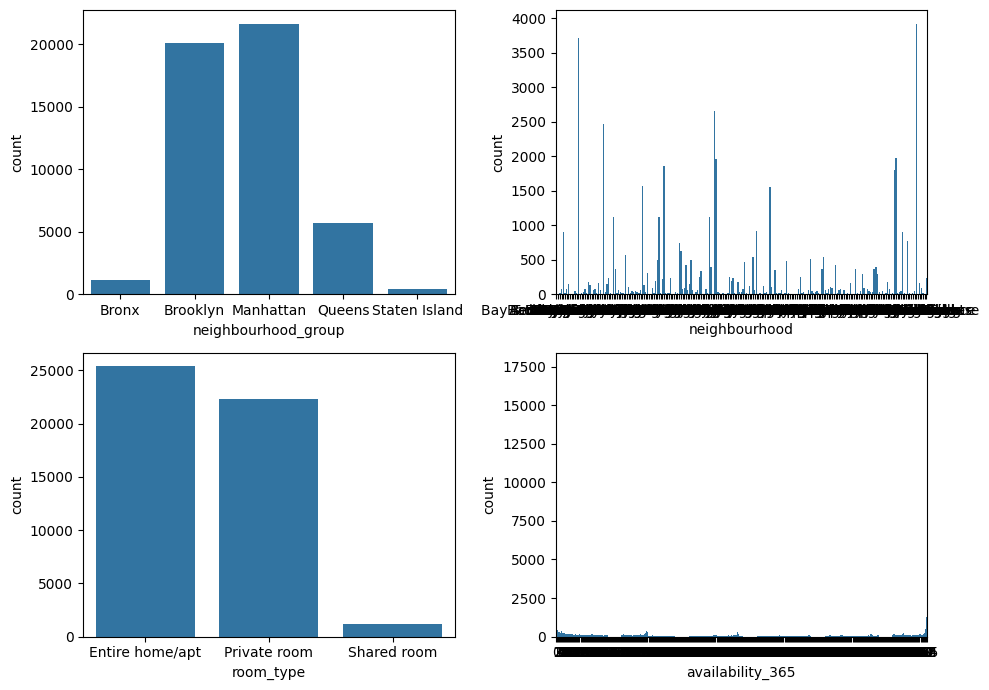

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(10, 7))

sns.countplot(data=df, x='neighbourhood_group', ax=ax[0,0])
sns.countplot(data=df, x='neighbourhood', ax=ax[0,1])
sns.countplot(data=df, x='room_type', ax=ax[1,0])
sns.countplot(data=df, x='availability_365', ax=ax[1,1])

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()


Se puede observar que la variable neighbourhood group, Manhattan tiene mas registros seguido por Brooklyn, y las otras ciudades que le siguen tienen muchos menos registros, de aca tambien podemos decir que prefieren los apartamentos completos, seguido por habitacion privada, y con muchos menos registros la habitacion compartida

#### Histograma Variables numericas

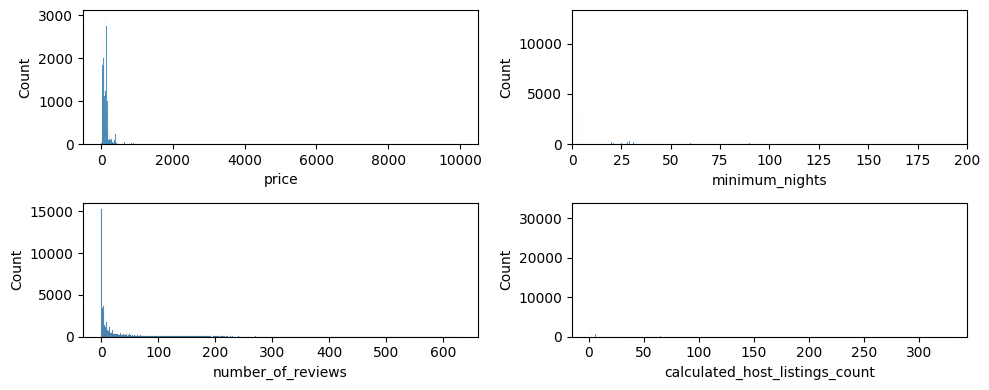

In [16]:
fig, ax = plt.subplots(2,2, figsize=(10, 4))
sns.histplot(data=df, x='price', ax=ax[0,0])
sns.histplot(data=df, x='minimum_nights', ax=ax[0,1]).set_xlim(0, 200)
sns.histplot(data=df, x='number_of_reviews', ax=ax[1,0])
sns.histplot(data = df, x = 'calculated_host_listings_count', ax = ax[1,1])
plt.tight_layout()
plt.show()

Se puede observar en las graficas que las variables son muy dispersas, se observa que hay muchos outliers

## 4. Analysis of multivariate variables

#### numerical analysis

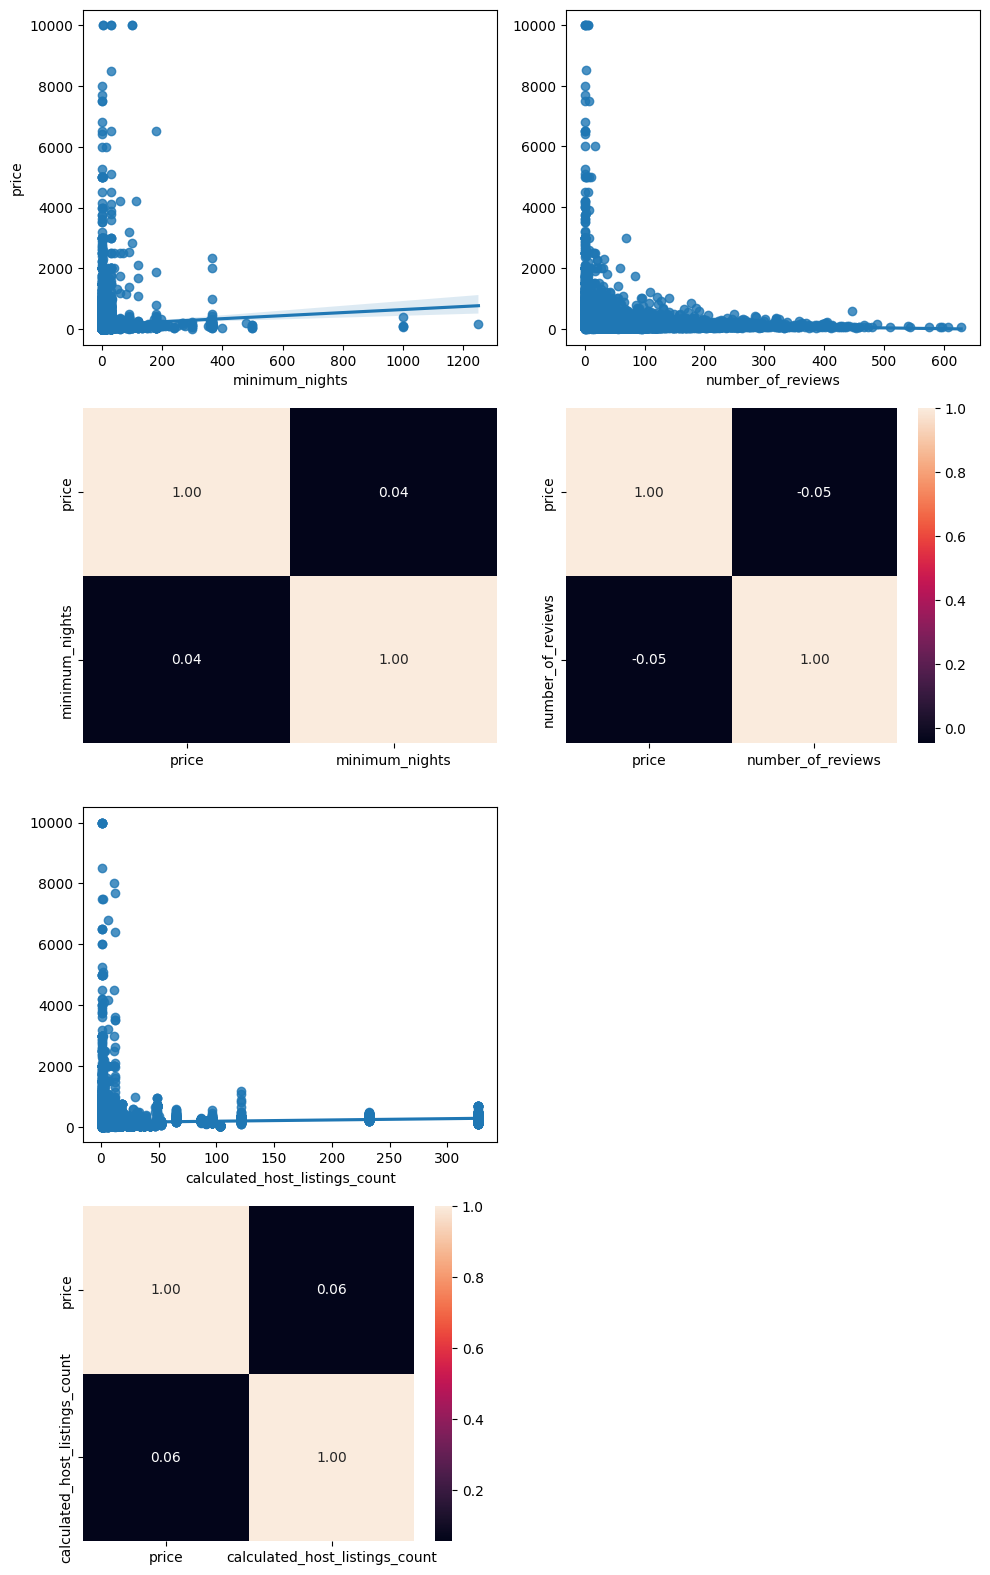

In [ ]:
fig, axis = plt.subplots(4, 2, figsize = (10, 16))
 
sns.regplot(ax = axis[0, 0], data = df, x = "minimum_nights", y = "price")
sns.heatmap(df[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(df[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = df, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(df[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

podemos observar que no existe relacion entre las variables numericas y el precio, tambien se observa que la corelacion numerica entre ellas es muy baja.

#### categorical analysis

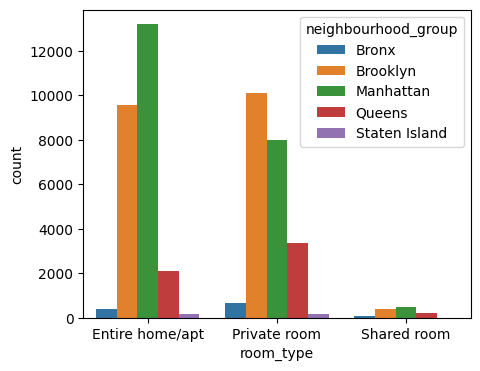

In [18]:
fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = df, x = "room_type", hue = "neighbourhood_group")

# Show the plot
plt.show()

Se puede observar en la grafica que Manhatan, tiene mas apartamentos completos para alquilar seguido por Brooklyn, a diferencia de las habitaciones privadas, hay mas en Brooklyn seguido de Manhatan, tambien se observa que las habitaciones compartidas son pocas en estos vecindarios.

#### Numerical-categorical analysis (complete)

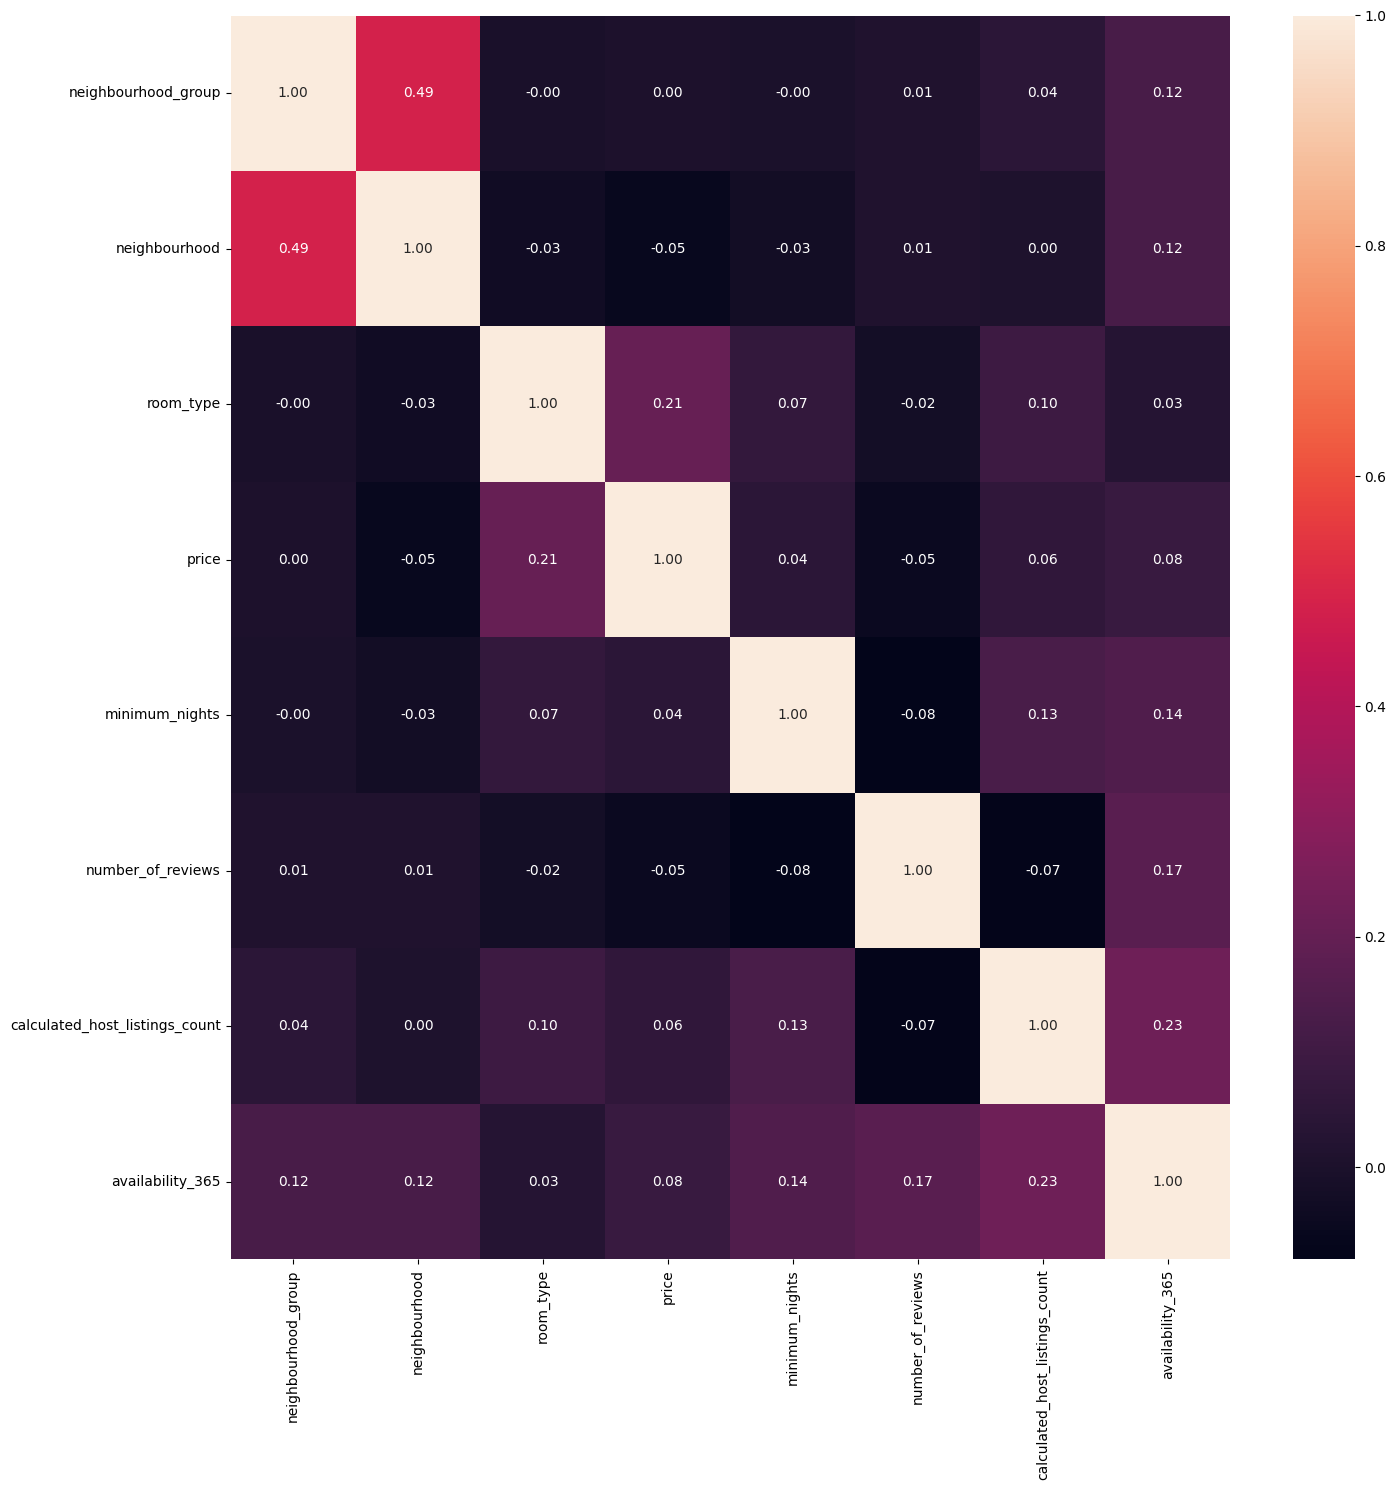

In [ ]:
fig, axes = plt.subplots(figsize=(15, 15))
# factorizar las variables room_type, neighbourhood_group, neighbourhood, para poder observarlas en la matriz de correlacion
df["room_type"] = pd.factorize(df["room_type"])[0]
df["neighbourhood_group"] = pd.factorize(df["neighbourhood_group"])[0]
df["neighbourhood"] = pd.factorize(df["neighbourhood"])[0]


sns.heatmap(df[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

En la matriz de correlacion se observa que las variables "neighbourhood_group" y "neighbourhood" tienen la correlacion mas alta de las variables, seguido por el precio y el tipo de habitacion.

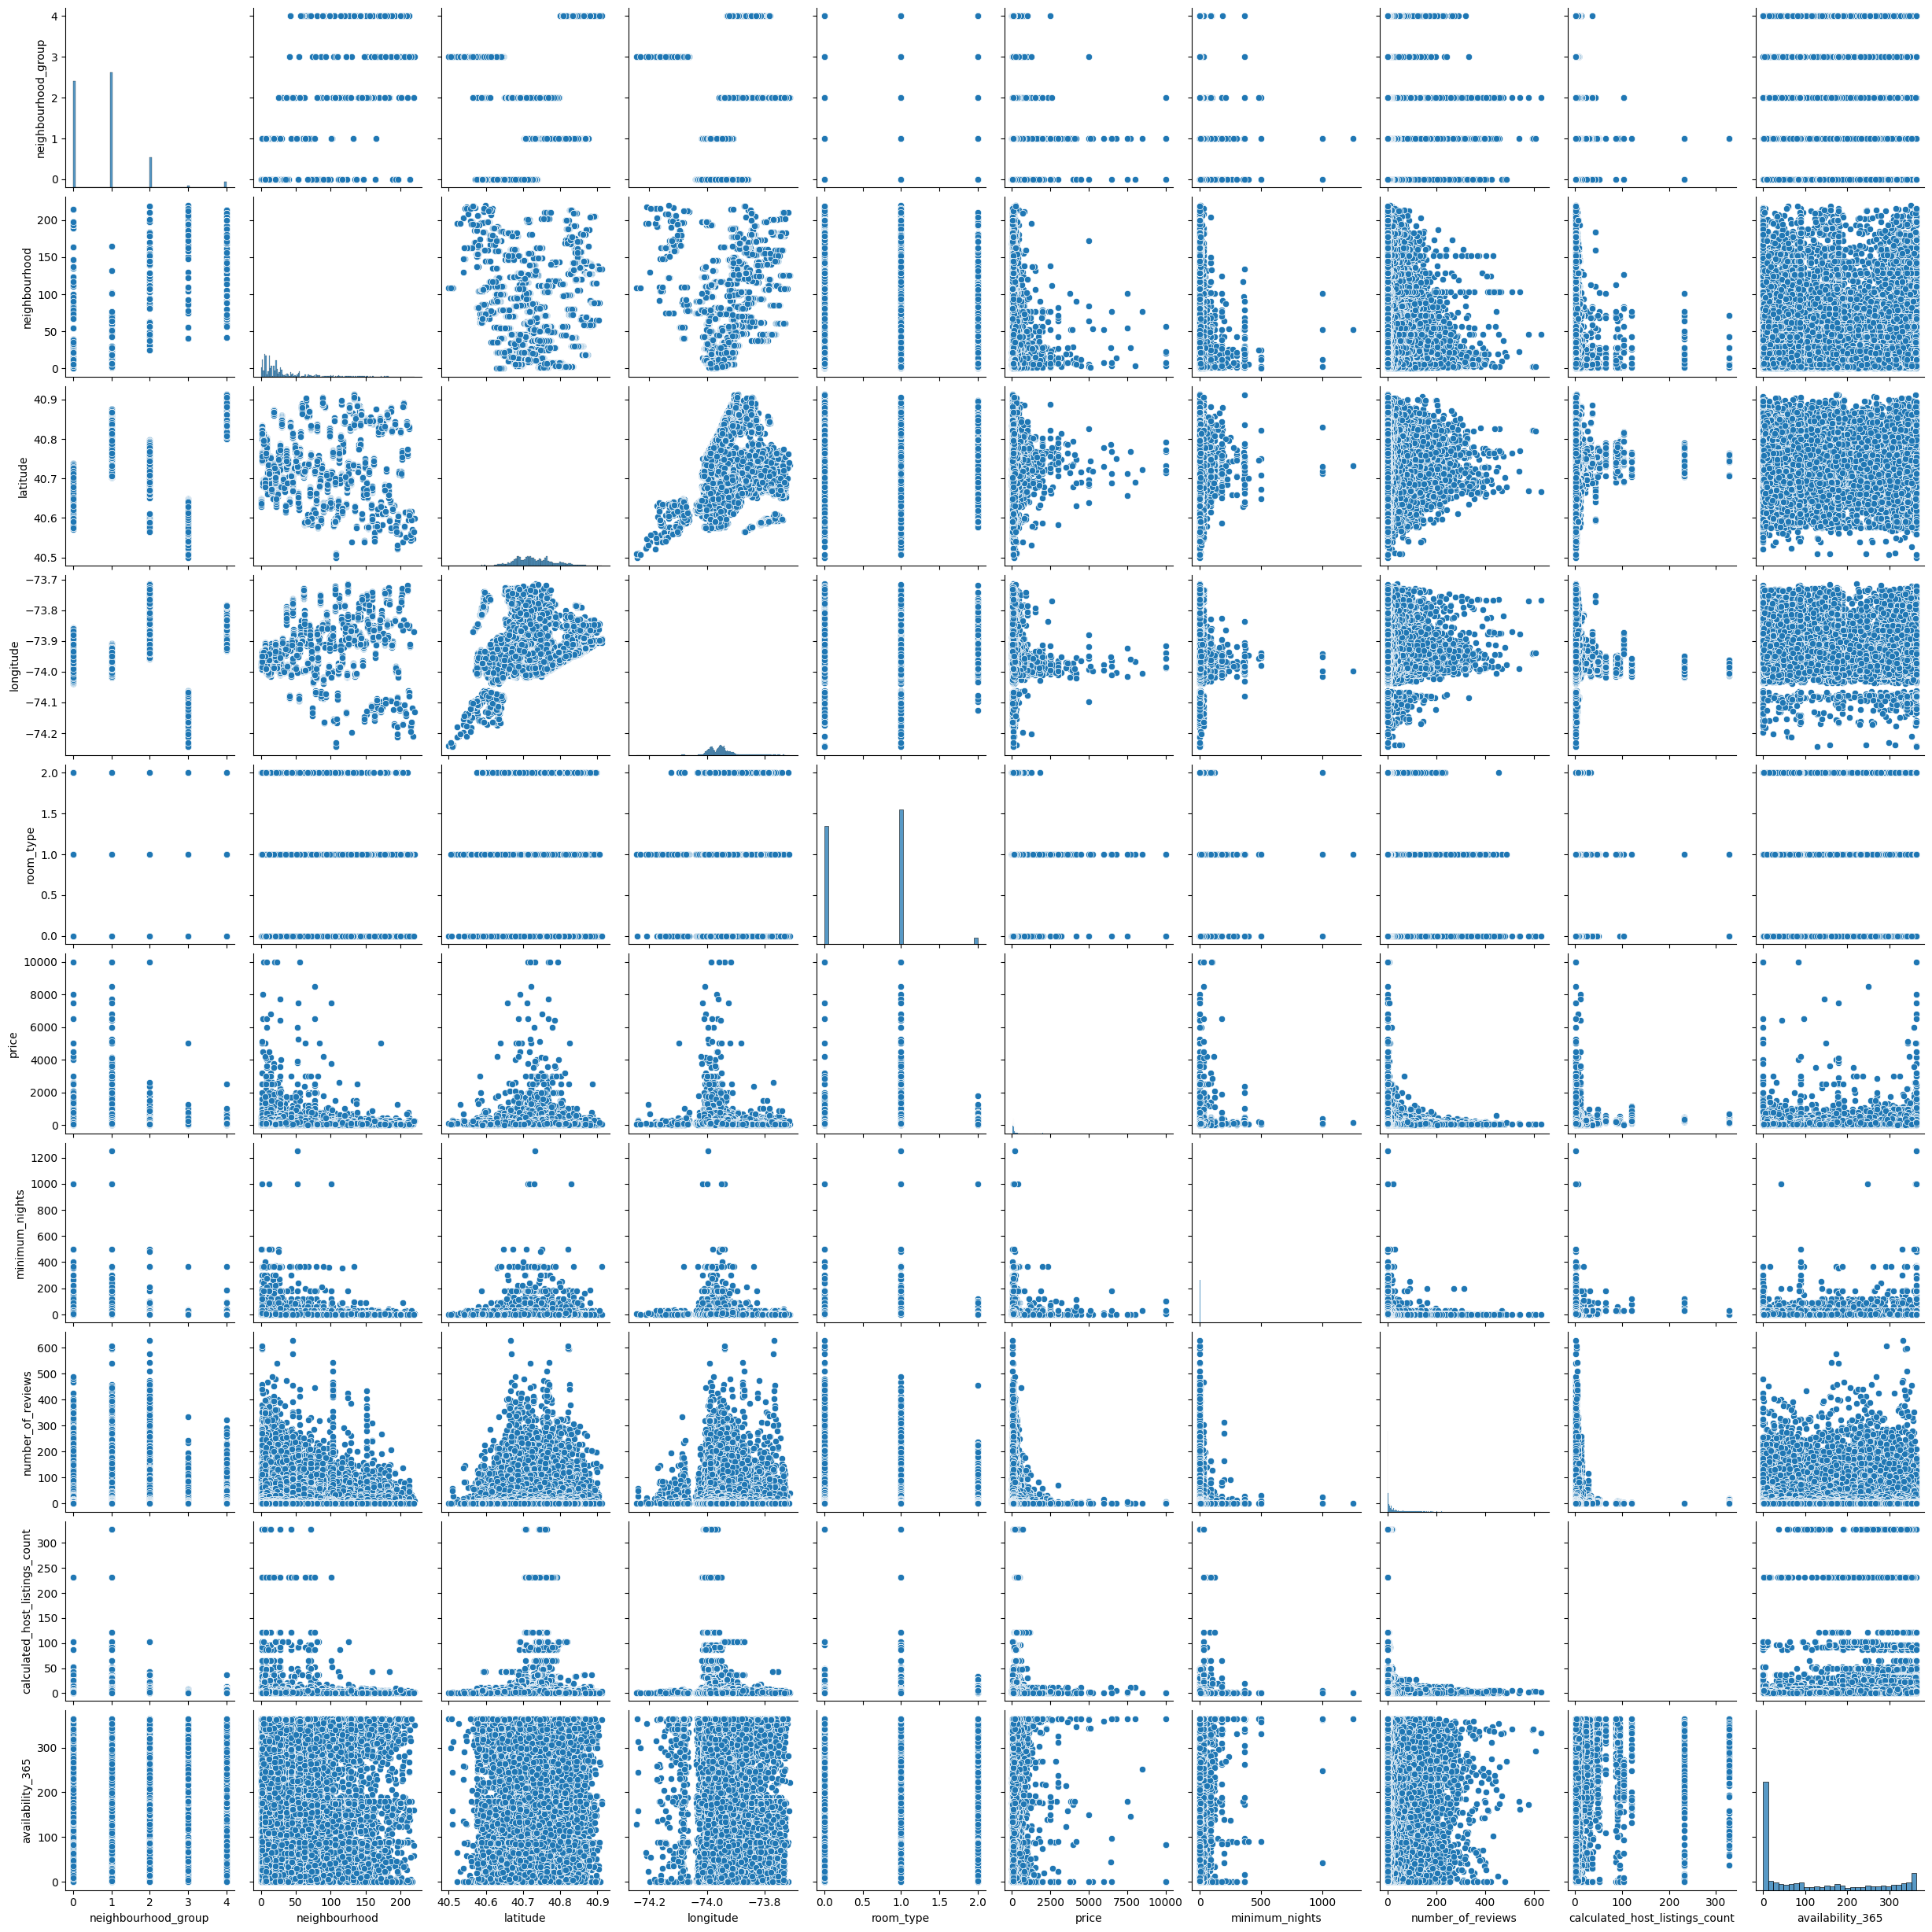

In [20]:
sns.pairplot(data = df) 
plt.show()

No se observa relacion directa entre las variables, solo podria decir la relacion lineal evidente entre la latitud y la longitud.

## 6. Feature selection

In [21]:
df.describe()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,0.786911,29.888782,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,0.844386,34.676634,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,0.000000,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,7.500000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,19.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.000000,37.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,4.000000,220.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


En la tabla anterior, observamos como ya se menciono anteriormente que las variables tienen mucha dispersion, se observa que la mediana y el maximo de cada variable tiene un rango muy amplio a diferencia del minimo con la mediana

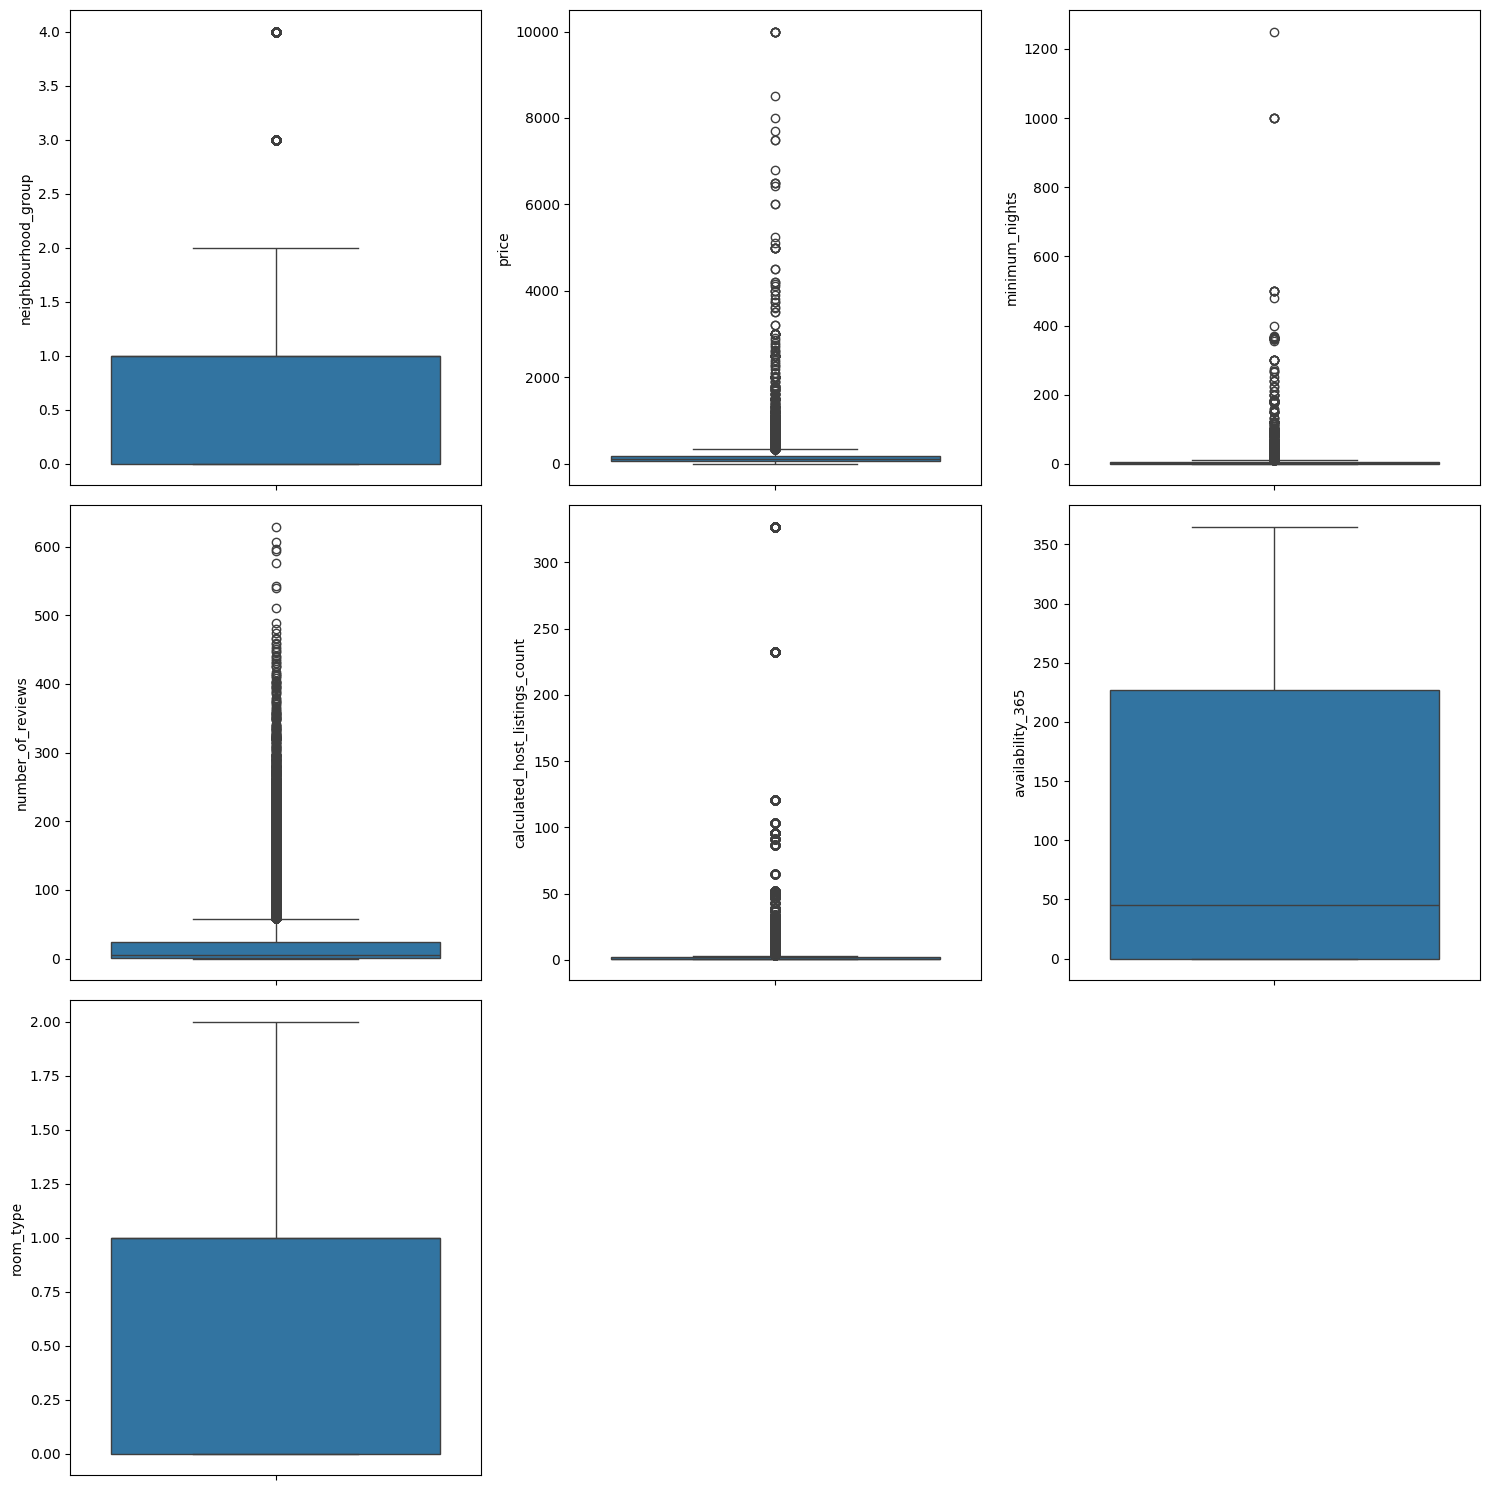

In [22]:
fig, ax = plt.subplots(3, 3, figsize = (15, 15))


sns.boxplot(ax=ax[0, 0], data = df, y = "neighbourhood_group")
sns.boxplot(ax=ax[0, 1], data = df, y = "price")
sns.boxplot(ax=ax[0, 2], data = df, y = "minimum_nights")
sns.boxplot(ax=ax[1, 0], data = df, y = "number_of_reviews")
sns.boxplot(ax=ax[1, 1], data = df, y = "calculated_host_listings_count")
sns.boxplot(ax=ax[1, 2], data = df, y = "availability_365")
sns.boxplot(ax=ax[2, 0], data = df, y = "room_type")
fig.delaxes(ax[2, 1])
fig.delaxes(ax[2, 2])

plt.tight_layout()

plt.show()

Se observa en el boxplot que las variables: "price", "minimum_nights", 'calculated_host_listings_count' tienen bastantes outliers, por lo que vamos a eliminar algunos de esos valores, trantando de ajustarnos a las caracteristicas de la data

#### outliers prices

In [23]:
price_stats = df["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [24]:
price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"Los limites superior e inferior para encontrar outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartil de {round(price_iqr, 2)}")

Los limites superior e inferior para encontrar outliers son 334.0 y -90.0, con un rango intercuartil de 106.0


In [25]:
# elimino los precios menores a 0 o NA
df = df[df["price"] > 0]

#### outliers minimum_nights

In [26]:
nights_stats = df["minimum_nights"].describe()
nights_stats

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [27]:
nights_iqr = nights_stats["75%"] - nights_stats["25%"]

upper_limit = nights_stats["75%"] + 1.5 * nights_iqr
lower_limit = nights_stats["25%"] - 1.5 * nights_iqr
print(f"Los limites superior e inferior para encontrar outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartil de {round(nights_iqr, 2)}")

Los limites superior e inferior para encontrar outliers son 11.0 y -5.0, con un rango intercuartil de 4.0


In [28]:
df = df[df["minimum_nights"] <= 20] # me parece que es razonable estadias de 20 dias, mas dias tiene muy pocas ocurrencias

#### outliers calculated_host_listings_count

In [29]:
calculated_stats = df["calculated_host_listings_count"].describe()
calculated_stats

count    43556.000000
mean         3.358894
std         21.650693
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [30]:
calculated_iqr = calculated_stats["75%"] - calculated_stats["25%"]

upper_limit = nights_stats["75%"] + 1.5 * calculated_iqr
lower_limit = nights_stats["25%"] - 1.5 * calculated_iqr
print(f"Los limites superior e inferior para encontrar outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartil de {round(calculated_iqr, 2)}")

Los limites superior e inferior para encontrar outliers son 6.5 y -0.5, con un rango intercuartil de 1.0


In [31]:
df = df[df["calculated_host_listings_count"] > 7] # como tengo un limite superior de 6.5, diria hasta 7 esta bien.

#### revisamos los valores nulos en las variables

In [32]:
df.isnull().sum().sort_values(ascending = False)

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#### Feature scaling

In [33]:
num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
                 "availability_365", "neighbourhood_group", "room_type"]

# dividimos la data en train y test
X = df.drop("price", axis = 1)[num_variables]
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2025)

X_train.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type
41424,6,2,327,295,1,1
43514,14,1,9,349,1,2
18083,87,1,15,305,0,0
32340,30,2,34,310,0,0
44990,0,1,15,359,1,0


### 6: Feature selection

In [34]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type
41424,0.023256,0.055556,1.000000,0.808219,0.25,0.5
43514,0.054264,0.000000,0.003135,0.956164,0.25,1.0
18083,0.337209,0.000000,0.021944,0.835616,0.00,0.0
32340,0.116279,0.055556,0.081505,0.849315,0.00,0.0
44990,0.000000,0.000000,0.021944,0.983562,0.25,0.0


In [ ]:
selection_model = SelectKBest(f_classif, k = 4) # con el test f_classif reducimos el dataset a las mejores 4 variables
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,minimum_nights,calculated_host_listings_count,availability_365,room_type
0,2,327,295,1
1,1,9,349,2
2,1,15,305,0
3,2,34,310,0
4,1,15,359,0


In [37]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False) #guardamos la data limpia y lista para trabajar algun modelo
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)